#Data Prepocessing and EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
train_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [10]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Check for duplicate values
If present the drop

In [12]:
train_data.drop_duplicates(inplace = True) #To drop duplicates values if present

### Dealing with missing values

In [13]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

####  If number of missing values is large wrt total values the dropping the column is suitable strategy

In [18]:
titanic = train_data.drop('Cabin', axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### In numerical columns missing values can be replaced by mean or median

In [19]:
avg_age = titanic['Age'].mean()
titanic['Age'].replace(np.nan,avg_age,inplace = True)

In [21]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### In categorical columns missing values can be replaced by mode

In [22]:
freq_port = titanic.Embarked.dropna().mode()[0]
titanic['Embarked'].replace(np.nan, freq_port, inplace = True)

In [23]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

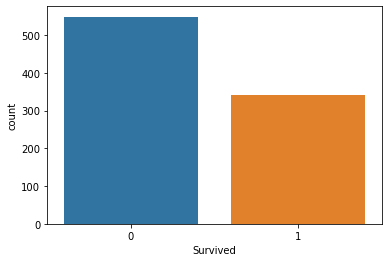

In [24]:
# To check dead and survived
sns.countplot(x = 'Survived', data = titanic)

<AxesSubplot:xlabel='Sex', ylabel='count'>

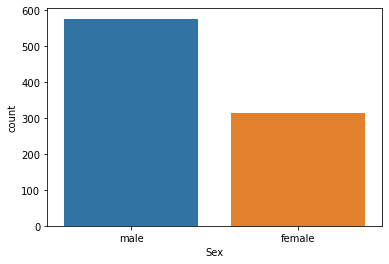

In [26]:
sns.countplot(x = 'Sex',data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

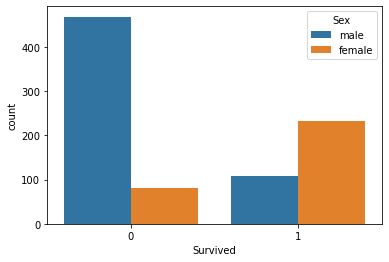

In [27]:
sns.countplot(x = 'Survived', hue ='Sex', data = titanic)

In [32]:
men_sv1_data = titanic[titanic.Sex == 'male']['Survived']
men_sv1_rate = sum(men_sv1_data)/len(men_sv1_data) * 100
print('Percentage of men survivors: ',men_sv1_rate)

Percentage of men survivors:  18.890814558058924


In [33]:
women_sv1_data = titanic[titanic.Sex == 'female']['Survived']
women_sv1_rate = sum(men_sv1_data)/ len(women_sv1_data) * 100
print('Percentage of women survivors: ',women_sv1_rate)

Percentage of women survivors:  34.71337579617834


In [38]:
result = titanic.groupby('Sex')['Survived'].value_counts(normalize = True)
result

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [39]:
print('Percentage of women who survived          :',result[0]*100)
print('Percentage of women who did not survive   :',result[1]*100)
print('Percentage of women who survived          :',result[2]*100)
print('Percentage of women who did not survive   :',result[3]*100)


Percentage of women who survived          : 74.20382165605095
Percentage of women who did not survive   : 25.796178343949045
Percentage of women who survived          : 81.10918544194108
Percentage of women who did not survive   : 18.890814558058924


<AxesSubplot:xlabel='Survived', ylabel='count'>

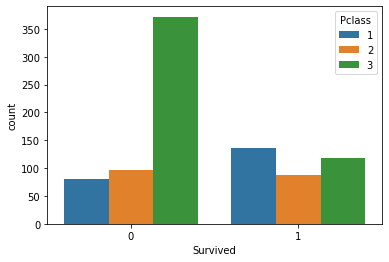

In [40]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic)

In [41]:
first_class = titanic[titanic.Pclass == 1]['Survived']
rate_fc = sum(first_class)/len(first_class) * 100
print('Percentage of first class survivors: ',rate_fc)

Percentage of men survivors:  62.96296296296296


In [42]:
second_class = titanic[titanic.Pclass == 2]['Survived']
rate_fc = sum(second_class)/len(second_class) * 100
print('Percentage of second class survivors: ',rate_fc)

Percentage of second class survivors:  47.28260869565217


In [44]:
third_class = titanic[titanic.Pclass == 3]['Survived']
rate_fc = sum(third_class)/len(third_class) * 100
print('Percentage of third survivors: ',rate_fc)

Percentage of third survivors:  24.236252545824847


In [47]:
titanic.groupby('Pclass')['Survived'].value_counts(normalize = True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

<AxesSubplot:ylabel='Age'>

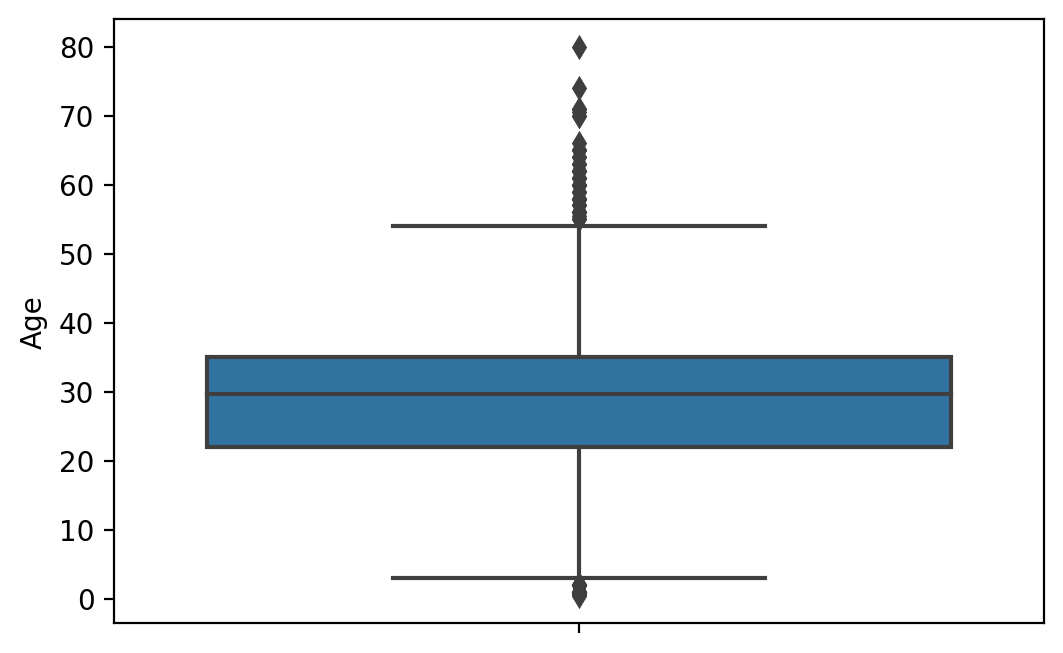

In [50]:
plt.figure(dpi =200)
sns.boxplot(y='Age', data = titanic)

In [52]:
titanic.Age.quantile(.25)

22.0

In [53]:
titanic.Age.quantile(.50)

29.69911764705882

In [54]:
titanic.Age.quantile(.75)

35.0

In [55]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:ylabel='Age'>

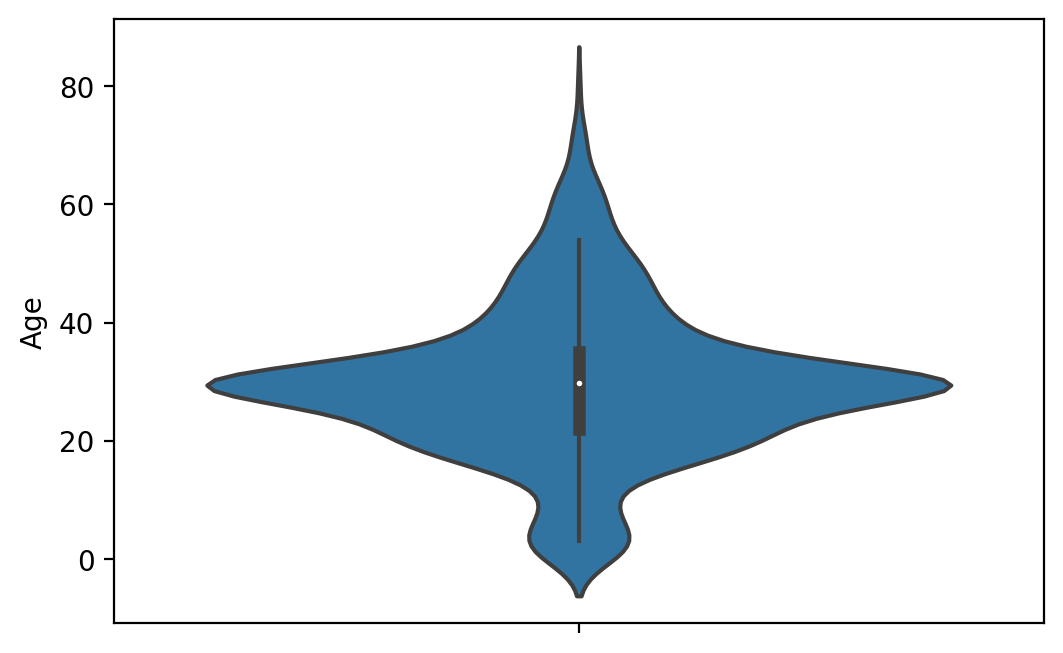

In [56]:
plt.figure(dpi =200)
sns.violinplot(y='Age', data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

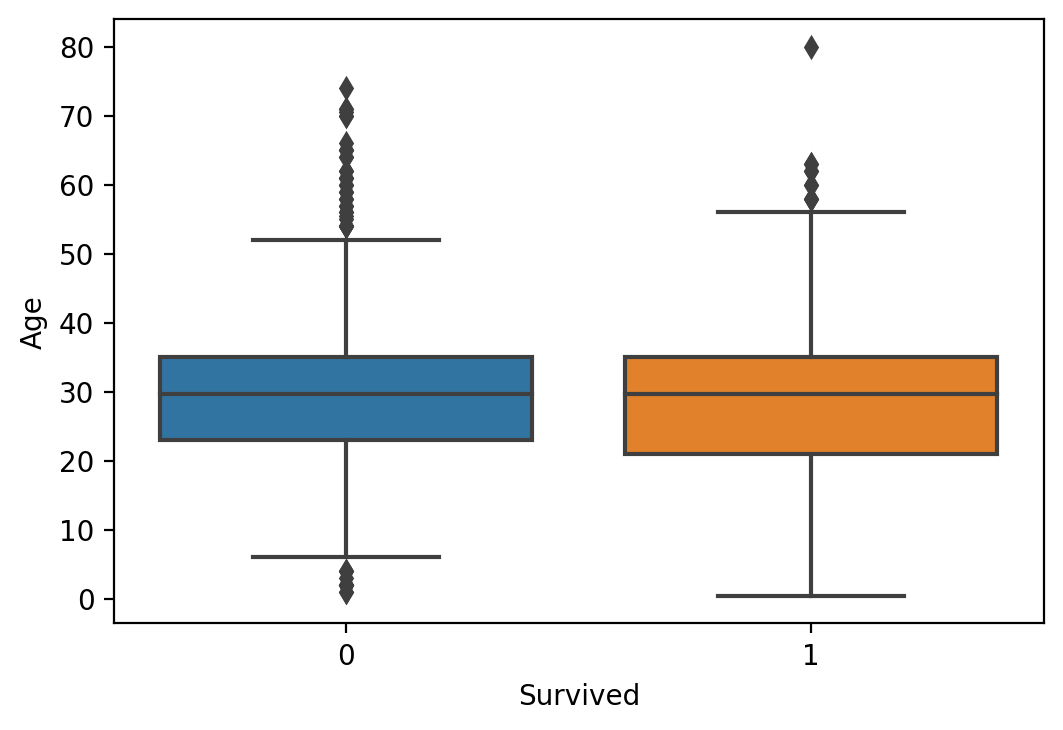

In [59]:
plt.figure(dpi =200)
sns.boxplot(x = 'Survived',y='Age', data = titanic)

In [61]:
mean_age_men = titanic[titanic.Sex =='male']['Age'].mean()
print('Mean age of males on the ship: ', mean_age_men)

Mean age of males on the ship:  30.50582424304206


In [62]:
mean_age_women = titanic[titanic.Sex =='female']['Age'].mean()
print('Mean age of females on the ship: ', mean_age_women)

Mean age of females on the ship:  28.216730048707397


In [63]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [64]:
mean_age_survivors = titanic[titanic.Survived ==1]['Age'].mean()
print('Mean age of survivors: ', mean_age_survivors)

Mean age of survivors:  28.54977812177503


In [66]:
mean_age_dead = titanic[titanic.Survived ==0]['Age'].mean()
print('Mean age of males on the ship: ', mean_age_dead)

Mean age of males on the ship:  30.415099646415896


In [67]:
titanic.groupby('Survived')['Age'].mean()


Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

In [68]:
titanic.groupby(['Sex','Survived'])['Age'].mean()

Sex     Survived
female  0           26.023272
        1           28.979263
male    0           31.175224
        1           27.631705
Name: Age, dtype: float64

<AxesSubplot:ylabel='Fare'>

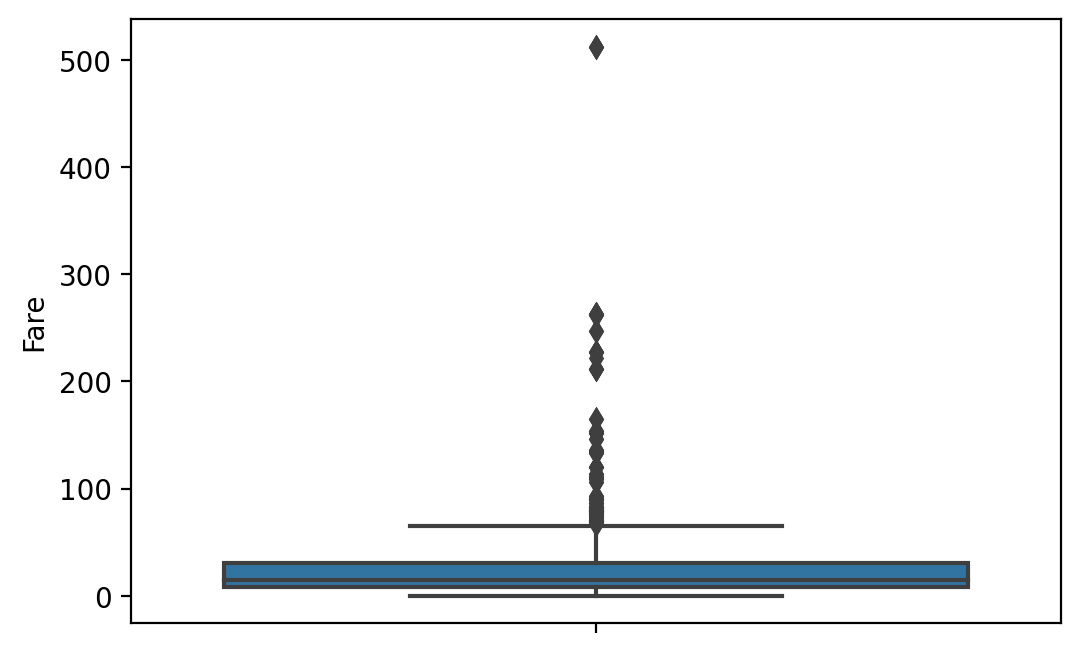

In [70]:
plt.figure(dpi = 200)
sns.boxplot(y = 'Fare', data = titanic)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

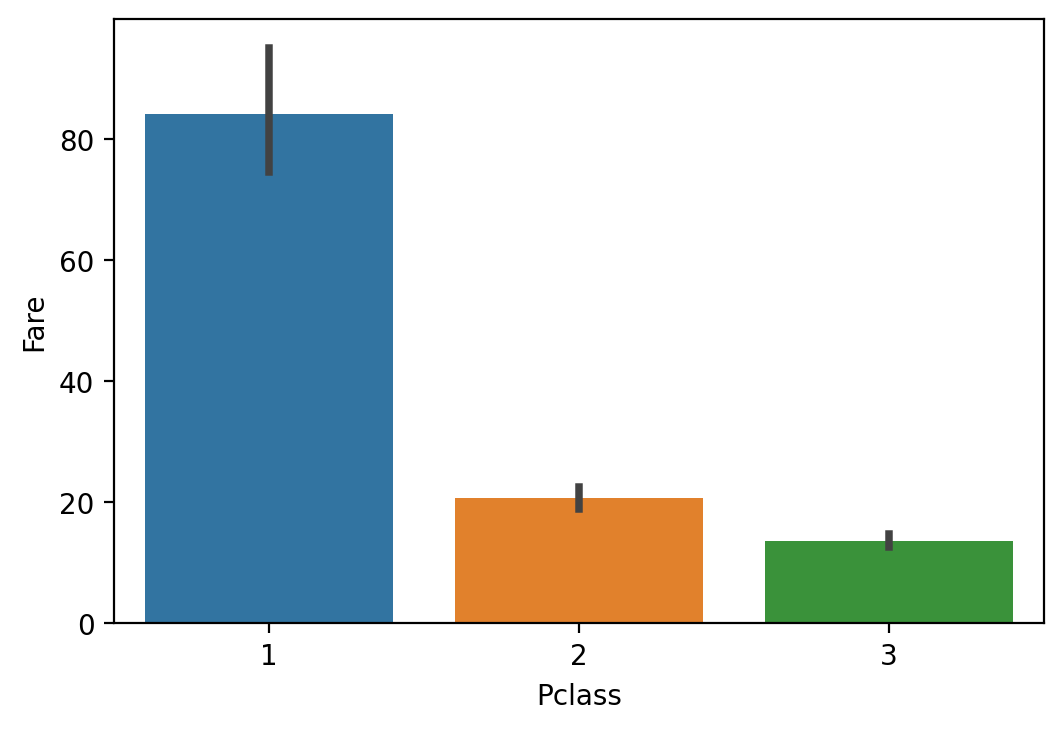

In [71]:
plt.figure(dpi =200)
sns.barplot(x = 'Pclass',y='Fare', data = titanic)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

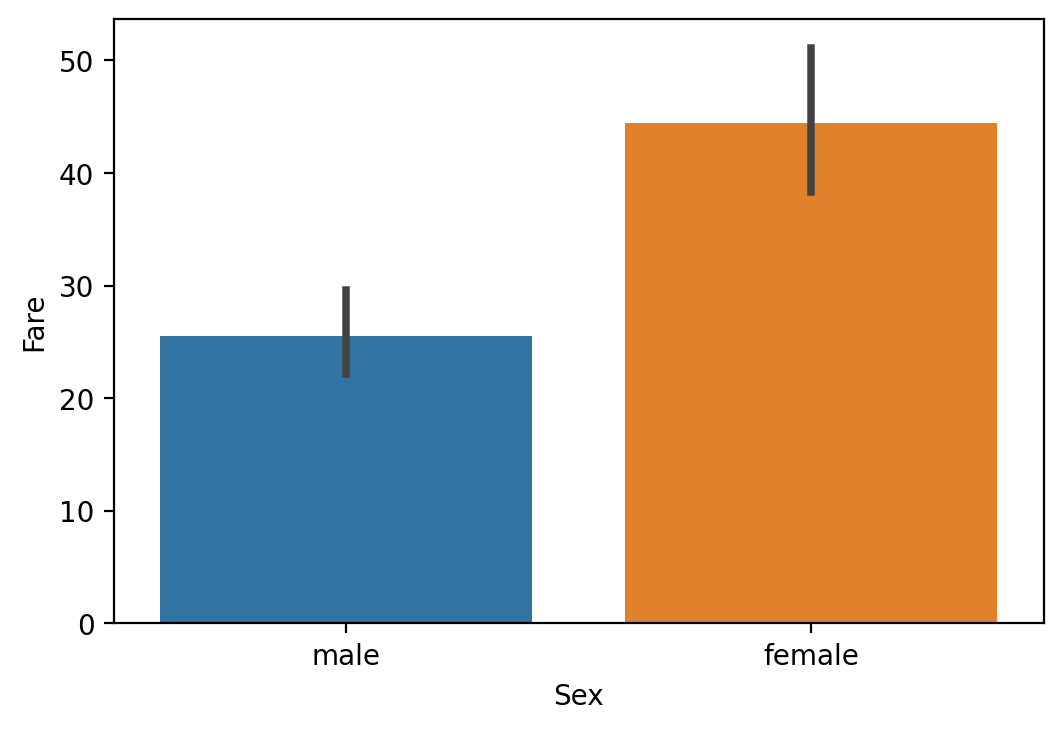

In [72]:
plt.figure(dpi =200)
sns.barplot(x = 'Sex',y='Fare', data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

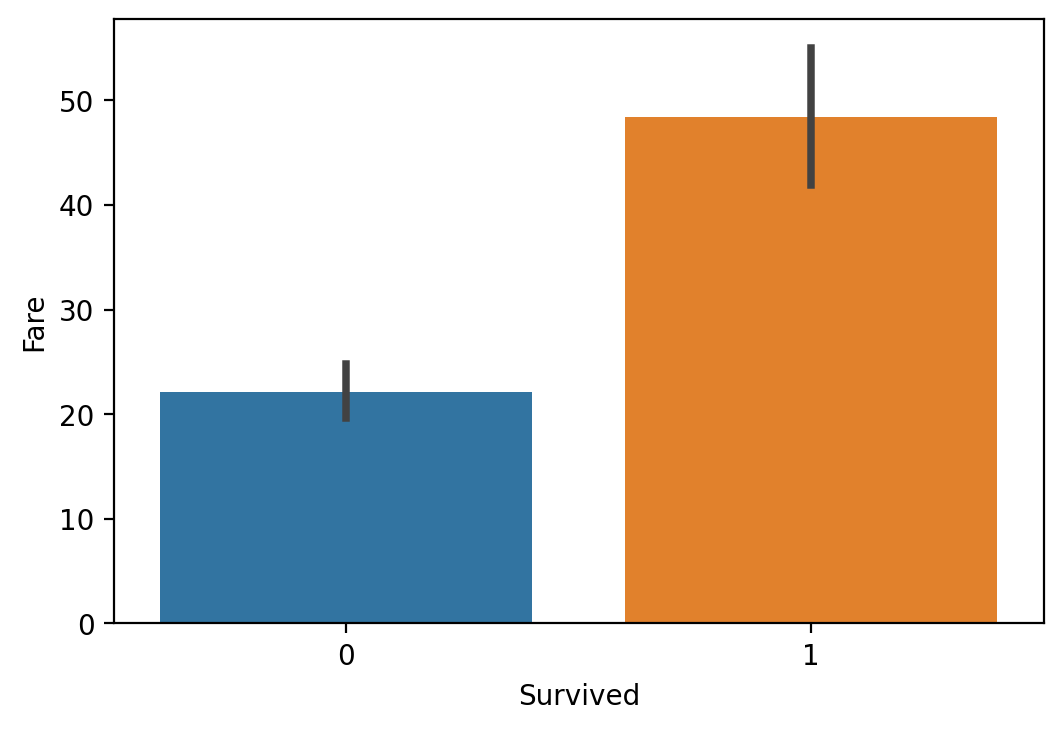

In [73]:
plt.figure(dpi =200)
sns.barplot(x = 'Survived',y='Fare', data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

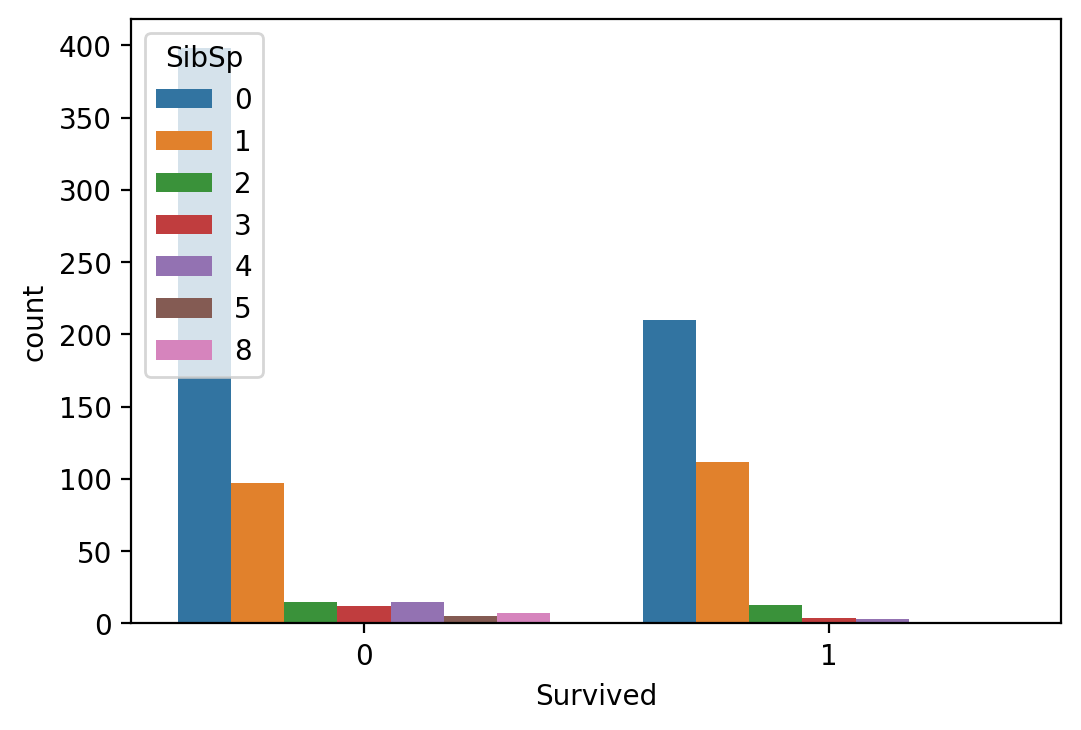

In [81]:
plt.figure(dpi =200)
sns.countplot(x ='Survived', hue = 'SibSp', data = titanic)